In [1]:
#현재위치 표시
import os
os.getcwd()

'/content'

#Chapter2

In [2]:
import sys
assert sys.version_info >= (3,5) #python version 3.5이상 확인

import sklearn
assert sklearn.__version__ >= "0.20" #sklearn version 0.20이상 확인

import numpy as np
import os

#그래프 axes = 14, x=12, y=12
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#저장할 위치: /content/images/end_to_end_project/
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#그림저장 함수: ex)fig_id.png (format=png, dpi=300)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##데이터 가져오기

In [3]:
import os
import tarfile
import urllib.request

#데이터 가져오기
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") #/content/datasets/housing/
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data() #data 호출 함수실행

In [5]:
import pandas as pd

#housing.csv파일 가져오기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head() #상위 데이터 5개 가져오기

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.tail() #하위 데이터 5개 가져오기

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
housing.info() #데이터 정보 가져오기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts() #ocean_proximity의 값 가져와서 카운트하기

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe() #숫자형 특성의 요약 통계값
#count: 숫자, mean: 평균, std: 표준편차, min: 최소값, max: 최대값

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


<function matplotlib.pyplot.show>

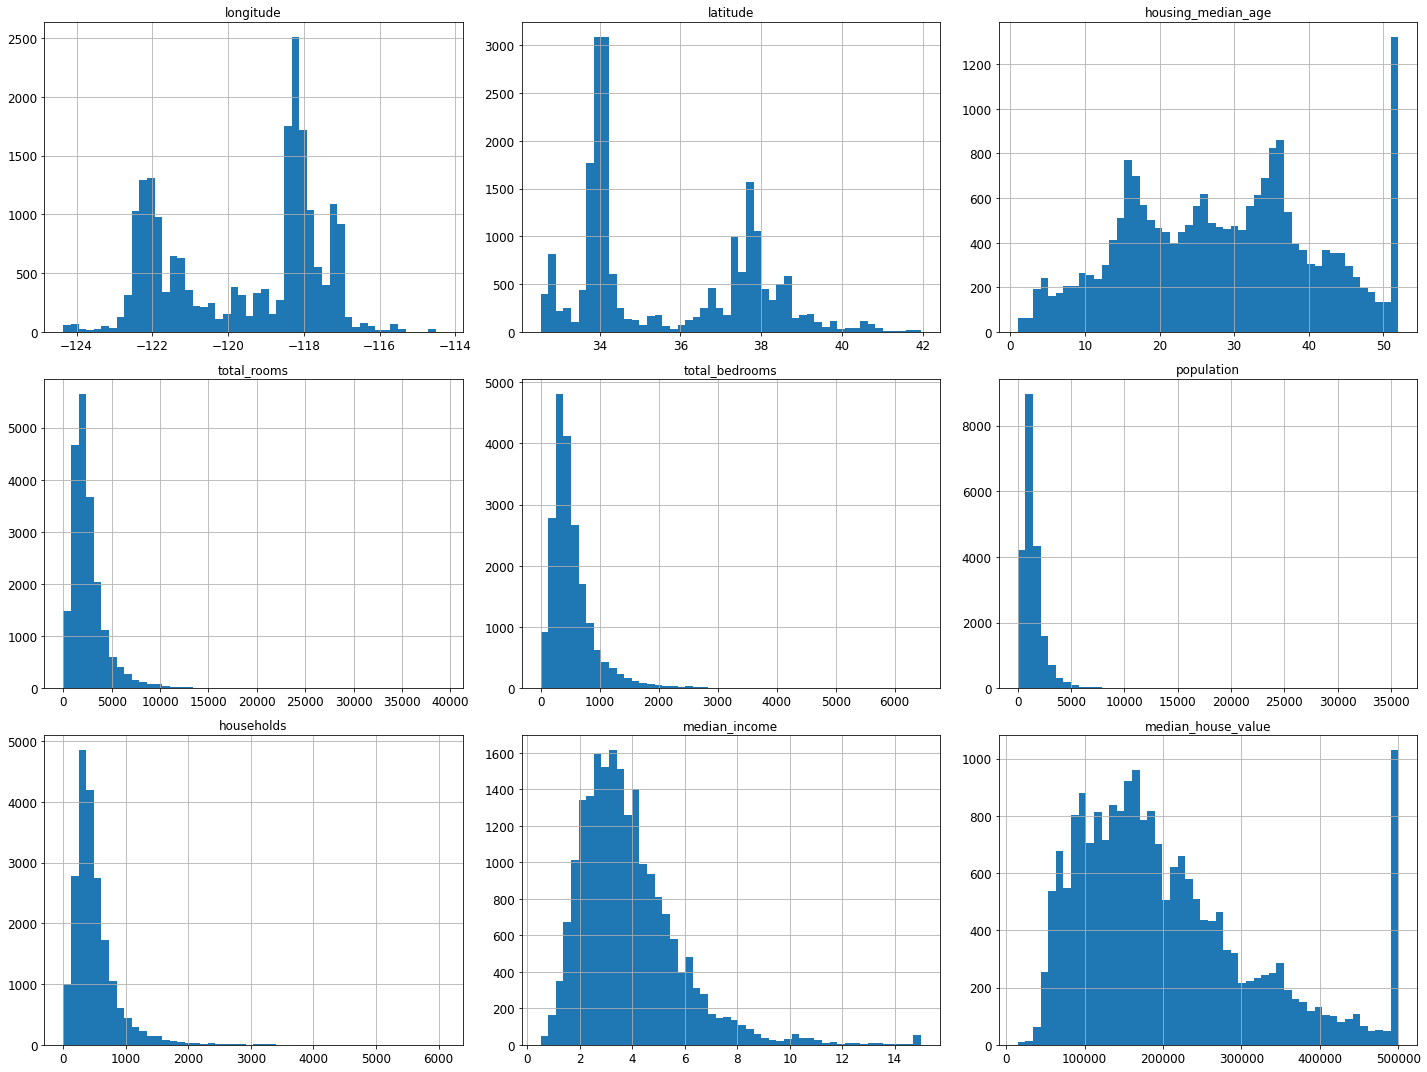

In [11]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15)) #histogram(도수분표표를 그래프로 나타낸것)
save_fig("attribute_histogram_plots") #저장함수 호출
plt.show #차트 실행

In [12]:
#노트북의 실행 결과가 동일하도록 randomseed 고정
np.random.seed(42)

In [13]:
#numpy배열을 이용한 test_set과 train_set 분리
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    #test_set_size 설정
    test_set_size = int(len(data) * test_ratio)
    #배열 슬라이싱 [:]
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    #data.iloc: 행단위 선택
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2) #데이터 분리 함수 호출

In [15]:
len(train_set) #train_set 길이

16512

In [16]:
len(test_set) #test_set 길이

4128

In [17]:
test_set.head() #test_set 상위데이터 5개 출력

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [18]:
train_set.head() #train_set 상위데이터 5개 출력

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


##데이터 이해를 위한 탐색과 시각화

In [19]:
housing = train_set.copy()

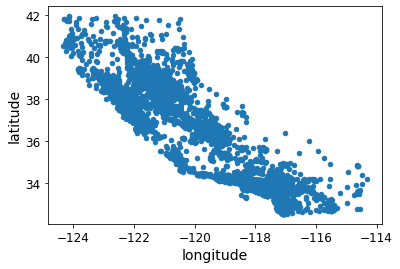

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

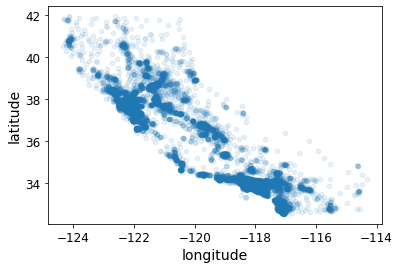

In [21]:
#alpha: 데이터 빈도를 자세하게 보여줌
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

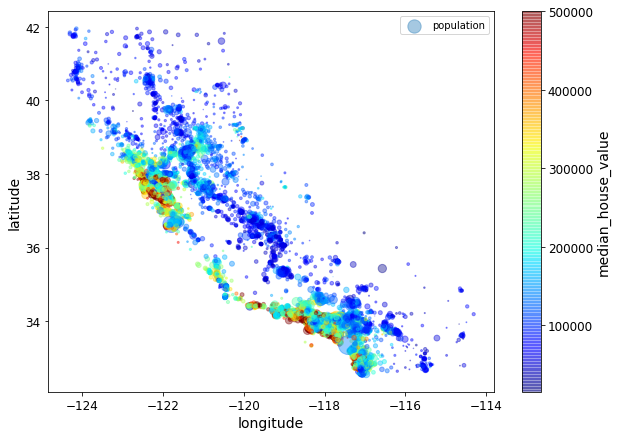

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,    #alpha값이 커질수록 더 찐한 그래프가 나옴
             s=housing["population"]/100, label="population", figsize=(10,7), #figsize가 커질수록 더 큰 사이즈의 그래프가 나옴
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,   
             sharex=False)
plt.legend()

In [23]:
#corr로 상관관계를 나타낼수있다.
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

#Prepare the data for Machine Learning algorithms

In [28]:
np.random.seed(789)

In [29]:
housing = load_housing_data()

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
train_set1, test_set1 = split_train_test(housing, 0.2)

In [32]:
housing = train_set1.drop("median_house_value", axis=1)
housing_labels = train_set1["median_house_value"].copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 851 to 4659
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [33]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND


In [34]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,INLAND


In [36]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [37]:
median

432.0

In [38]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147,INLAND


In [39]:
from sklearn.impute import SimpleImputer    #Simplelmputer: 데이터타입 생성
imputer = SimpleImputer(strategy="median")  #imputer: 인스턴스

In [40]:
housing_num = housing.drop("ocean_proximity", axis=1)   #datatype이 숫자가 아닌 ocean_proximity열 삭제

In [41]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [42]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [43]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [44]:
X = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,   #누락된 데이터까지 채운 pandas data
                          index=housing.index)

In [46]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147


In [47]:
housing_cat = housing[["ocean_proximity"]] #숫자형 데이터들 중간값을 구한후 다시 문자형 데이터 병합ousing_cat = housing[["ocean_proximity"]] #숫자형 데이터들 중간값을 구한후 다시 문자형 데이터 병합
housing_cat.head(10)

,ocean_proximity
851,NEAR BAY
11666,<1H OCEAN
3877,<1H OCEAN
2573,NEAR OCEAN
3330,INLAND
9659,INLAND
17286,NEAR OCEAN
120,NEAR BAY
1488,NEAR BAY
11219,<1H OCEAN


In [48]:
from sklearn.preprocessing import OrdinalEncoder #OrdinalEncoder: text처리

ordinal_encoder = OrdinalEncoder()  #ordinal_encoder: 문자데이터를 숫자로 변환
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) #fit: 분석, transform: 변환
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.],
       [4.],
       [3.],
       [3.],
       [0.]])

In [49]:
ordinal_encoder.categories_ #카테고리 확인 하지만 숫자간의 연관성은 없음음

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
housing_cat_1hot.toarray() #numpy array형태

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [59]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

In [60]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
851,-122.03,37.6,24,2077,383,1488,389,4.5721,NEAR BAY,5.33933,3.82519
11666,-118.01,33.85,29,2064,447,1265,400,3.8864,<1H OCEAN,5.16,3.1625
3877,-118.5,34.21,36,1254,229,629,245,4.9643,<1H OCEAN,5.11837,2.56735
2573,-124.11,40.81,23,959,212,425,175,2.5536,NEAR OCEAN,5.48,2.42857
3330,-122.48,38.9,10,304,63,161,61,2.1964,INLAND,4.98361,2.63934


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
housing_num_tr

array([[-1.22457025,  0.91883375, -0.36978199, ..., -0.03663245,
         0.06883982, -0.44128976],
       [ 0.77975225, -0.83683722,  0.02771295, ..., -0.10752009,
         0.00821971,  0.04211812],
       [ 0.53544428, -0.66829281,  0.58420585, ..., -0.12397698,
        -0.04622217, -0.46811225],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ..., -0.2725341 ,
        -0.09167505, -0.0179651 ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  1.02209413,
        -0.01608941, -1.1943049 ],
       [ 0.63017594, -0.74320144,  0.50470687, ..., -0.49984832,
         0.07446617,  0.54447575]])

In [63]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [64]:
housing_prepared

array([[-1.22457025,  0.91883375, -0.36978199, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77975225, -0.83683722,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53544428, -0.66829281,  0.58420585, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63017594, -0.74320144,  0.50470687, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
housing_prepared.shape

(16512, 16)